<a href="https://colab.research.google.com/github/twyeh/AI-in-education/blob/main/SNN_for_free_fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
建構一個類神經網路模型，學習一個物體自高度10公尺處以自由落體方式落下過程的實驗數據，並視覺化模型的預測結果與真實數據進行比較。

## 生成數據

### Subtask:
建立模擬自由落體過程的實驗數據，包含時間和高度。


**Reasoning**:
Set up parameters for free fall simulation, generate time points, calculate corresponding heights using the free fall formula, and store the data in a pandas DataFrame.



In [1]:
import numpy as np
import pandas as pd

# 1. 設定模擬自由落體過程所需的參數
initial_height = 10  # 初始高度 (公尺)
gravity = 9.8  # 重力加速度 (公尺/秒^2)
time_steps = 100  # 時間點數量
simulation_duration = np.sqrt((2 * initial_height) / gravity) # 模擬時間長度直到物體落地

# 2. 生成一系列時間點
time = np.linspace(0, simulation_duration, time_steps)

# 3. 根據自由落體公式計算每個時間點對應的物體高度
# 公式: h(t) = h0 - 0.5 * g * t^2
height = initial_height - 0.5 * gravity * time**2

# 確保高度不會小於零 (物體落地後高度為零)
height[height < 0] = 0

# 4. 將生成的時間數據和高度數據儲存在 Pandas DataFrame 中
free_fall_data = pd.DataFrame({'time': time, 'height': height})

# 顯示前幾行數據
display(free_fall_data.head())

,time,height
0,0.00000,10.000000
1,0.01443,9.998980
2,0.02886,9.995919
3,0.04329,9.990817
4,0.05772,9.983675


## 建立模型

### Subtask:
定義一個類神經網路模型。


**Reasoning**:
Import necessary modules from TensorFlow and Keras, define a sequential model, add dense layers for the input, hidden, and output, compile the model, and display the model summary.



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Define a sequential neural network model.
model = Sequential()

# 3. Add the first dense layer (input layer).
# Input shape is 1 because we have one input feature: time.
model.add(Dense(units=32, activation='relu', input_shape=(1,)))

# 4. Add one or more additional dense layers (hidden layers).
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# 5. Add the output dense layer.
# Output shape is 1 because we are predicting one value: height.
# No activation function for a regression task.
model.add(Dense(units=1))

# 6. Compile the model.
model.compile(optimizer='adam', loss='mse')

# 7. Display a summary of the model's architecture.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

## 訓練模型

### Subtask:
使用生成的數據訓練類神經網路模型。


**Reasoning**:
Prepare the input and output data for the model and then train the neural network model using the prepared data.



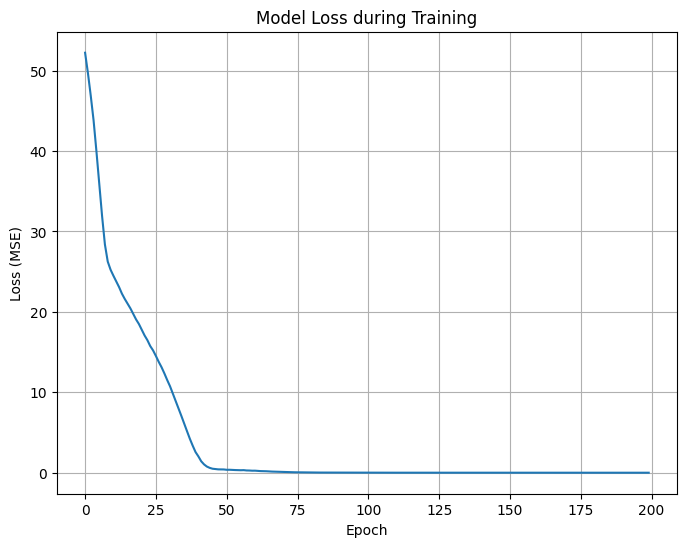

In [3]:
# 1. Prepare input (X) and target output (y) data.
X = free_fall_data['time'].values.reshape(-1, 1)
y = free_fall_data['height'].values

# 2. Train the model using the .fit() method.
# Setting appropriate epochs and batch_size.
history = model.fit(X, y, epochs=200, batch_size=16, verbose=0)

# 4. Display the training history (e.g., loss over epochs).
# You can access the loss values from history.history['loss']
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

## 評估模型

### Subtask:
評估訓練好的模型的效能。


**Reasoning**:
Use the trained model to predict heights for the time data and calculate the Mean Squared Error (MSE) to evaluate the model's performance.



In [4]:
from sklearn.metrics import mean_squared_error

# 1. Use the trained model to predict heights for the time data.
predicted_height = model.predict(X)

# 2. Calculate the Mean Squared Error (MSE) between predicted_height and the true height data.
mse = mean_squared_error(y, predicted_height)

# 3. Display the calculated MSE.
print(f"Mean Squared Error (MSE): {mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Mean Squared Error (MSE): 0.0007056860132480279


## 視覺化結果

### Subtask:
視覺化模型的預測結果與真實數據進行比較。


**Reasoning**:
Visualize the true data and model predictions using scatter and line plots respectively, add titles, labels, and legend, then display the plot.



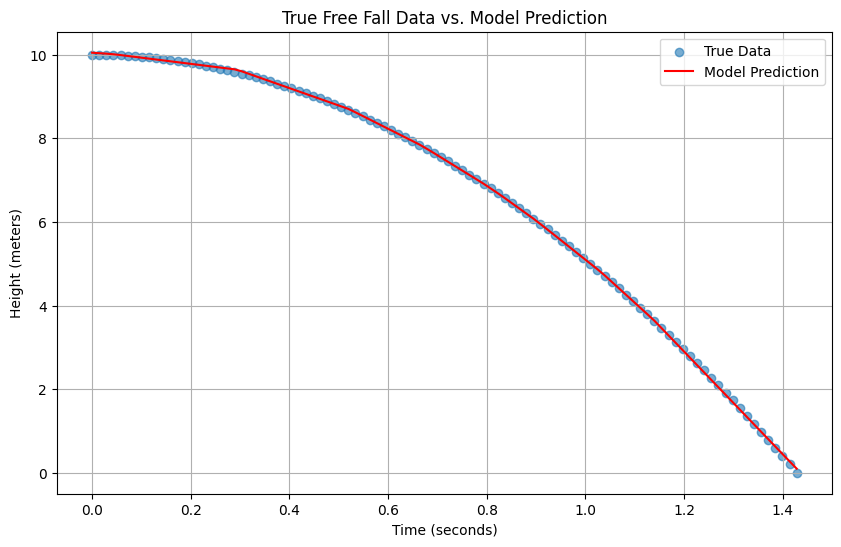

In [5]:
import matplotlib.pyplot as plt

# 1. Create a figure and axes for the plot.
plt.figure(figsize=(10, 6))

# 2. Plot the true free-fall height data as a scatter plot.
plt.scatter(free_fall_data['time'], free_fall_data['height'], label='True Data', alpha=0.6)

# 3. Plot the model predicted height data as a line plot.
# Ensure predicted_height is a 1D array for plotting
plt.plot(free_fall_data['time'], predicted_height.flatten(), color='red', label='Model Prediction')

# 4. Add title, x-axis label, and y-axis label to the plot.
plt.title('True Free Fall Data vs. Model Prediction')
plt.xlabel('Time (seconds)')
plt.ylabel('Height (meters)')

# 5. Add a legend to differentiate between the true data and model predictions.
plt.legend()

# 6. Add a grid for better readability.
plt.grid(True)

# 7. Display the plot.
plt.show()

## Summary:

### Data Analysis Key Findings

*   The simulated free-fall data was generated for an object falling from 10 meters, with time points and corresponding heights calculated based on the free-fall formula.
*   A sequential neural network model was built with an input layer, two hidden layers (32, 64, 32 units respectively, using ReLU activation), and an output layer for regression.
*   The model was successfully trained for 200 epochs using the simulated data, and the training loss decreased over time, as shown by the loss plot.
*   The Mean Squared Error (MSE) between the model's predictions and the true height data was calculated as approximately 0.000706, indicating a low error.
*   The visualization comparing the true data points and the model's predicted line shows that the model's predictions closely follow the true free-fall trajectory.

### Insights or Next Steps

*   The trained neural network model is effective at learning the relationship between time and height in a free-fall scenario based on the simulated data.
*   Further evaluation could involve testing the model's performance on a separate test set to ensure it generalizes well to unseen data within the simulated context.
